In [25]:
rolling_frame = 50
steps = 2000
num_agents = 100
iterations = 20
frame_size = 1
env_path = ''
logs_path = env_path + 'logs/'
figure_path = env_path + 'figures/'

In [26]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

In [27]:
def count_line(file):
    with open(file) as csv_file:
        count_line = sum(1 for _ in csv_file)
        return count_line

In [28]:
# plot alive agents' obedience, health value, emotion
# process_data

# sim_setting = ['primitive_prob', 'sanction_prob', 'emote_prob', 'message_prob', 'hint_prob']
sim_setting = ['message_prob']
# sim_setting = ['sanctioning_weighted', 'feeling_weighted', 'message_weighted', 'hint_weighted']

with open(logs_path + 'sum_agent.csv', 'a', newline = '') as csv_file:
    writer = csv.writer(csv_file, delimiter = ',')
    writer.writerow(['type', 'steps', 'infected','healthy', 'asymptomatic', 'mild', 'critical', 'deceased', 'vaccinated', 'forced_quarantine', 'violation', 'isolation', 'robustness', 'stay_home', 'voluntarily_stay_home_infected', 'self_directed_emotion', 'other_directed_emotion', 'desire_satisfaction', 'total_number_infections', 'reward'])

for file_name in sim_setting:
    file_path = logs_path + file_name + '/' + file_name + '_agent.csv'
#     file_path = logs_path + file_name + '_agent.csv'
    with open(file_path) as csv_file:
        healthy_arr, asymptom_arr, symptom_arr, critical_arr, deceased_arr, infected_arr =  0, 0, 0, 0, 0, 0
        vaccinated, FQ, violated, complied, robustness, at_home, coerced, self_directed_emotion, other_directed_emotion = 0, 0, 0, 0, 0, 0, 0, 0, 0
        goal_satisfaction, infected_times, reward = 0, 0, 0
        count_lines = count_line(file_path)
        csv_reader = csv.reader(csv_file, delimiter = ',')
        last_iter, last_step, last_id = 0, 1, -1
        avg_healthy, avg_asymptom, avg_symptom, avg_critical, avg_deceased, avg_infected = [0 for i in range(int(steps/frame_size))], [0 for i in range(int(steps/frame_size))], [0 for i in range(int(steps/frame_size))], [0 for i in range(int(steps/frame_size))], [0 for i in range(int(steps/frame_size))], [0 for i in range(int(steps/frame_size))]
        avg_vaccinated, avg_FQ, avg_violated, avg_complied = [0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))]
        avg_at_home, avg_coerced = [0 for i in range(int(steps/frame_size))],[0.0 for i in range(int(steps/frame_size))]
        avg_self_emotion, avg_other_emotion = [0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))]
        avg_robustness, avg_goal_satisfaction, avg_infected_times = [0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))],[0 for i in range(int(steps/frame_size))]
        avg_reward = [0 for i in range(int(steps/frame_size))]
        for row in csv_reader:
            last_idx = int((last_step - 1) / frame_size)
            if last_iter != int(row[0]) or last_idx != int((int(row[1]) - 1) / frame_size):
                
                avg_healthy[last_idx] += healthy_arr
                avg_asymptom[last_idx] += asymptom_arr
                avg_symptom[last_idx] += symptom_arr
                avg_critical[last_idx] += critical_arr
                avg_deceased[last_idx] += deceased_arr
                avg_infected[last_idx] += infected_arr
                
                avg_vaccinated[last_idx] += vaccinated
                avg_FQ[last_idx] += FQ
                avg_violated[last_idx] += violated
                avg_complied[last_idx] += complied
                
                avg_at_home[last_idx] += at_home
                avg_coerced[last_idx] += coerced
                
                avg_self_emotion[last_idx] += self_directed_emotion
                avg_other_emotion[last_idx] += other_directed_emotion
                
                avg_goal_satisfaction[last_idx] += goal_satisfaction
                avg_infected_times[last_idx] += infected_times
                avg_reward[last_idx] += reward
                
                healthy_arr, asymptom_arr, symptom_arr, critical_arr, deceased_arr, infected_arr =  0, 0, 0, 0, 0, 0
                vaccinated, FQ, violated, complied, at_home, coerced, self_directed_emotion, other_directed_emotion = 0, 0, 0, 0, 0, 0, 0, 0
                goal_satisfaction, infected_times, reward = 0, 0, 0

# self.iteration, self.schedule.steps, agent.unique_id, 
# agent.health, agent.infected_times, agent.reward, 
# agent.FQ_frames, agent.vaccinated, agent.vaccine_last,
# agent.intention, agent.last_action, agent.x, 
# agent.y, agent.self_directed_emotion, agent.other_directed_emotion
            
            # record the numer of each health state
            if row[3] == '0':
#             if row[3] in ('0', '1'):
                healthy_arr += 1
            elif row[3] == '1':
                asymptom_arr += 1
            elif row[3] == '2':
                symptom_arr += 1
            elif row[3] == '3':
                critical_arr += 1
            elif row[3] == '4':
                deceased_arr += 1
            
            # asymptomatic, symptomatic and critical are all infected
            if row[3] in ('1','2','3'):
                infected_arr += 1
            
            # number of vaccinated agents
            if row[7] == 'True':
                vaccinated += 1
            
            # infected and going out = compliance violation
            if row[3] in ('1','2','3') and row[10] in ('1','2','3'):
                violated += 1
            
            # infected and stay home = compliance
            if row[3] in ('1','2','3') and row[10] == '0':
                complied += 1
            
            if row[11] == '0':
                at_home += 1
                if row[9] != '0' or int(row[6]) == 0:
                    coerced += 1
                # number of home-quarantine
                elif int(row[6]) > 0 and row[11] == '0':
                    FQ += 1
            
            if row[9] != row[10] or row[9] == '-1':
                goal_satisfaction += 0
            else:
                goal_satisfaction += 1
            
            # number of times being infected
            infected_times += int(row[4])
            
            reward += float(row[5])
            
#             if file_name not in ('primitive', 'sanctioning', 'message'):
#                 self_directed_emotion += float(row[13])
#                 other_directed_emotion += float(row[14])

            if count_lines == csv_reader.line_num:
                avg_healthy[last_idx] += healthy_arr
                avg_asymptom[last_idx] += asymptom_arr
                avg_symptom[last_idx] += symptom_arr
                avg_critical[last_idx] += critical_arr
                avg_deceased[last_idx] += deceased_arr
                avg_infected[last_idx] += infected_arr
                
                avg_vaccinated[last_idx] += vaccinated
                avg_FQ[last_idx] += FQ
                avg_violated[last_idx] += violated
                avg_complied[last_idx] += complied
                
                avg_at_home[last_idx] += at_home
                avg_coerced[last_idx] += coerced
                
                avg_self_emotion[last_idx] += self_directed_emotion
                avg_other_emotion[last_idx] += other_directed_emotion
                
                avg_goal_satisfaction[last_idx] += goal_satisfaction
                avg_infected_times[last_idx] += infected_times
                avg_reward[last_idx] += reward

                for j in range(len(avg_healthy)):
                    avg_healthy[j] /= (iterations)
                    avg_asymptom[j] /= (iterations)
                    avg_symptom[j] /= (iterations)
                    avg_critical[j] /= (iterations)
                    avg_deceased[j] /= (iterations)
                    avg_infected[j] /= (iterations)
                    
                    avg_vaccinated[j] /= (iterations)
                    avg_FQ[j] /= (iterations)
                    
                    avg_robustness[j] = 1 if avg_complied[j] == 0 and avg_violated[j] == 0 else (avg_complied[j] / (avg_violated[j] + avg_complied[j]))
                    
                    avg_violated[j] /= (iterations)
                    avg_violated[j] = avg_violated[j] / avg_infected[j] if avg_infected[j] > 0 else 0
                    avg_complied[j] /= (iterations)
                    avg_complied[j] = avg_complied[j] / avg_infected[j] if avg_infected[j] > 0 else 1
                    
                    avg_at_home[j] /= (iterations)
                    avg_coerced[j] /= (iterations)

                    if avg_coerced[j] > 0:
                        avg_coerced[j] /= (avg_healthy[j] + avg_infected[j])
                    else:
                        avg_coerced[j] = 0
                    
                    avg_self_emotion[j] /= (iterations * num_agents)
                    avg_other_emotion[j] /= (iterations * num_agents)
                    
                    avg_goal_satisfaction[j] /= (iterations * num_agents)
                    avg_infected_times[j] /= (iterations * num_agents)
                    avg_reward[j] /= (iterations * num_agents)
                    
            last_iter = int(row[0])
            last_step = int(row[1])

    with open(logs_path + 'sum_agent.csv', 'a', newline = '') as csv_file:
        writer = csv.writer(csv_file, delimiter = ',')
        for i in range(len(avg_healthy)):
            writer.writerow([file_name, i + 1, avg_infected[i], avg_healthy[i], avg_asymptom[i], avg_symptom[i], avg_critical[i], avg_deceased[i], avg_vaccinated[i], avg_FQ[i], avg_violated[i], avg_complied[i], avg_robustness[i], avg_at_home[i], avg_coerced[i], avg_self_emotion[i], avg_other_emotion[i], avg_goal_satisfaction[i], avg_infected_times[i], avg_reward[i]])

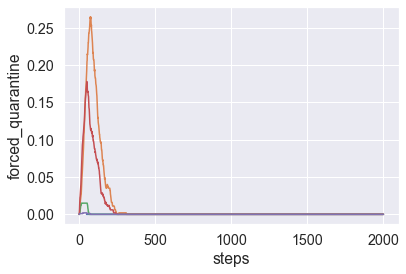

In [9]:
dataframe = pd.read_csv(logs_path + 'sum_agent.csv', error_bad_lines = False)
dataframe['forced_quarantine'] = dataframe['forced_quarantine'].rolling(rolling_frame).mean()
sns_plot = sns.lineplot(y=dataframe.forced_quarantine, x=dataframe.steps, hue=dataframe.type, data=dataframe)
# sns.boxplot(x=dataframe.type, y=dataframe.home_quarantine)
# sns.boxplot(y=dataframe.type, x=dataframe.home_quarantine)
fig = sns_plot.get_figure()
plt.legend([],[], frameon=False)
fig.savefig(figure_path + "home_quarantine.pdf", bbox_inches='tight') 
# force stay home infected

In [ ]:
# generate rolling datapoints

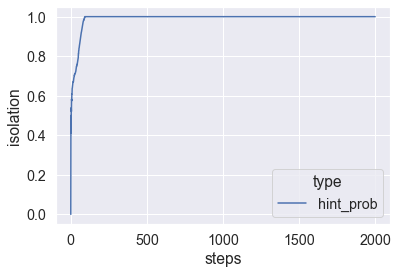

In [73]:
# sim_setting = ['primitive', 'sanctioning', 'feeling_prob', 'message_prob', 'hint_prob']
file_name = 'hint_prob'
dataframe = pd.read_csv(logs_path + file_name + '.csv')
dataframe['infected'] = dataframe['infected'].rolling(rolling_frame, min_periods=1).mean()
dataframe['healthy'] = dataframe['healthy'].rolling(rolling_frame, min_periods=1).mean()
dataframe['healthy'] = dataframe['healthy'].rolling(rolling_frame, min_periods=1).mean()
dataframe['asymptomatic'] = dataframe['asymptomatic'].rolling(rolling_frame, min_periods=1).mean()
dataframe['mild'] = dataframe['mild'].rolling(rolling_frame, min_periods=1).mean()
dataframe['critical'] = dataframe['critical'].rolling(rolling_frame, min_periods=1).mean()
dataframe['deceased'] = dataframe['deceased'].rolling(rolling_frame, min_periods=1).mean()
dataframe['vaccinated'] = dataframe['vaccinated'].rolling(rolling_frame, min_periods=1).mean()
dataframe['isolation'] = dataframe['isolation'].rolling(rolling_frame, min_periods=1).mean()
dataframe['forced_quarantine'] = dataframe['forced_quarantine'].rolling(rolling_frame, min_periods=1).mean()
dataframe['self_directed_emotion'] = dataframe['self_directed_emotion'].rolling(rolling_frame, min_periods=1).mean()
dataframe['other_directed_emotion'] = dataframe['other_directed_emotion'].rolling(rolling_frame, min_periods=1).mean()
dataframe['desire_satisfaction'] = dataframe['desire_satisfaction'].rolling(rolling_frame, min_periods=1).mean()
dataframe['total_number_infections'] = dataframe['total_number_infections'].rolling(rolling_frame, min_periods=1).mean()
dataframe.to_csv(logs_path + file_name + '_rolling_50.csv', index=False)
sns_plot = sns.lineplot(y=dataframe.isolation, x=dataframe.steps, hue=dataframe.type, data=dataframe)

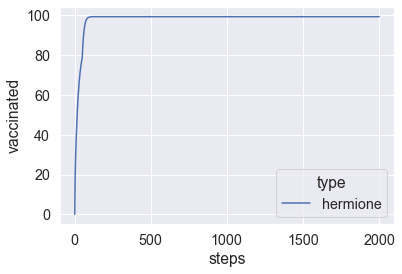

In [62]:
sns_plot = sns.lineplot(y=dataframe.vaccinated, x=dataframe.steps, hue=dataframe.type, data=dataframe)